#### Style Block
<style>
* { max-width = 800px; }
    
.column {
  float: left;
  width: 50%;
}

/* Clear floats after the columns */
.row:after {
  content: "";
  display: table;
  clear: both;
}
</style>

# Verkefni IIA
## Samanburður á tímaflækju aðgerða í þremur útfærslum af lyklasöfnum
### Höfundur: Erling Óskar Kristjánsson
<hr>
#### Námskeið: Greining Reiknirita
#### Umsjónarmaður: Hjálmtýr Hafsteinsson
#### Stofnun: Háskóli Íslands
#### Vor 2019
<hr>

## 1. Lýsing

Í þessu verkefni verða útfærðar og bornar saman þrjár gagnagrindur til að útfæra lyklasafn.
Gagnagrindurnar eru:

1. Tvíleitartré (Binary Search Tree)
2. Hrúgutré (Treap)
3. Skopplisti (Skip list)

Gagnagrindurnar verða útfærðar í Python með aðgerðunum:

- Innsetning
- Uppfletting

Smíðaðar verða gagnagrindur og gögn.

Aðferðirnar verða svo tímamældar.

Innsetningin á $n_0=500$, $n_1=2500$ og $n_2=5000$ lyklum þar sem gildi lyklana verður $1, 3, 5, ..., 2n_i-1$ verður tímamæld. Röðun lyklanna við innsetingu verður tvenns konar:

- Lyklarnir eru í slembiröð.
- Lyklarnir eru í hækkandi röð, burtséð frá $\frac{n}{10}$ handahófskenndum víxlunum (hér eftir: '~_hækkandi_ röð')

Fyrir hvora gerð af innsetningu verða svo framkvæmdar tvær mismunandi tímamælingar á leit að $m_0=50.000$, $m_1=100.000$ og svo $m_2=200.000$ lyklum. Í öllum tilfellum verða allir lyklar jafnlíklegir til að verða fyrir leitinni, en ýmist verður...

- Einungis leitið að lyklum sem eru í gagnagrindinni, eða
- Helmingur leitana verða að gildum sem eru ekki í gagnagrindinni.

Því má summera tímamælingar á leit upp í:

- Slembin innsetning, aðeins leitað að lyklum í gagnagrindinni
- Slembin innsetning, helmingur leitana árangurslaus
- Náröðuð innsetning, aðeins leitað að lyklum í gagnagrindinni
- Náröðuð innsetning, helmingur leitana árangurslaus


Niðurstöður verða svo birtar í töflum og línuritum, og verða þær bornar saman og túlkaðar.
<hr>

<hr>
## 2. Útfærsla á Gagnagrindum

In [1]:
""""""""" global imports """""""""
import math, random, time
import numpy as np
import matplotlib.pyplot as plt

<hr>
### 2.1 Tvíleitartré
Tvíleitartré er klassísk lyklasafn. Styrkleiki tvíleitartrésins er sá að útfærslan er auðveld. Það þarf ekki að hafa sérstakan klasa fyrir tré með rót, og annan fyrir nóður, því rótin breytist aldrei (nema henni sé eytt, en þessi útfærsla bíður ekki upp á eyðingar). Ef tréið er í jafnvægi þá er innsetningartími og leitartími fyrirsjáanlegur.

In [2]:
# Tvíleitartré
class Tree:

    # Smiður
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

    # Innseting
    def insert(self, data):
        if self.data:
            if data < self.data:
                if self.left is None:
                    self.left = Tree(data)
                else:
                    self.left.insert(data)
            elif data > self.data:
                if self.right is None:
                    self.right = Tree(data)
                else:
                    self.right.insert(data)
        else:
            self.data = data

    # Uppfletting    
    def contains(self, key):
        if key < self.data:
            if self.left is None:
                return False
            return self.left.contains(key)
        elif key > self.data:
            if self.right is None:
                return False
            return self.right.contains(key)
        else:
            return True

<hr>
### 2.2 Hrúgutré
Hrúgutréið hefur sér klasa fyrir tréið sjálft þar sem haldið er utan um hvaða nóða er rót. Aðgerðir eru framkvæmdar á tréið, sem geymir nóður.

Hrúgutréið uppfyllir hrúguskilyrði þar sem nóður með hærri forgang (lægra gildi á _self.priority_) eru ofar í trénu. Útfærslan bíður ekki upp á að hægt sé að velja forgang á innsetta gildið, en í staðinn er framkölluð handahófskennd fleytitala á bilinu $[0,1)$ sem eru u.þ.b. $2^53$ ólík gildi, og líkurnar á að fá þá sömu tvisvar því gríðarlega litlar. Annars væri hægt að smíða forgangs-mengi (_Python set_) af tölum við smíði trésins og fjarlægja gildi úr því mengi og nota sem forgang. Þetta mengi þyrfti þó að að vera að endanlegri stærð, sem myndi takmarka stærð trésins.

Leitin er mjög lík leitinni í tvíleitartré, fyrir utan að fyrst þarf að gá hvort hrúgutréið sé tómt, og ef ekki, þá skalhefja leit eins og í tvíleitartrénu út frá rótinni. Það lengir leitartíma örlítið, en hefur minni áhrif eftir því sem tréið verður stærra.

Sama á svo við um innsetningu í hrúgutréið, nema að þar þarf einnig að laga hrúguskilyrðin eftir hverja innsetningu. Því er haldið fram í bókinni að snúningarnir taki bara fastan (nánast hunsanlega) tíma, en við munum sjá á tímamælingunum t.d. hvort innsetning á gildum með lyklum í slembinni röð sé þá raunverulega jafn snöggur í hrúgutréum og í tvíleitartréi.

In [3]:
class TreapNode():
    # Smiður
    def __init__(self, data, parent = None):
        self.data = data
        self.priority = random.random()
        self.parent = parent
        self.left = None
        self.right = None


class Treap():
    # Smiður
    def __init__(self):
        self.root = None

    # Uppfletting
    def contains(self, data):
        if self.root is None:
            return False
        self.__contains__(data, self.root)
    
    def __contains__(self, data, r):
        if data < r.data:
            if r.left is None:
                return False
            return self.__contains__(data, r.left)
        elif data > r.data:
            if r.right is None:
                return False
            return self.__contains__(data, r.right)
        else:
            return True

    # Innsetning
    def insert(self, data):
        if self.root is None:
            self.root = TreapNode(data)
            return
        self.__insert__(data, self.root)
        
    def __insert__(self, data, r):
        if data < r.data:
            if r.left is None:
                r.left = TreapNode(data, r)
                self.balance(r.left)
            else:
                self.__insert__(data, r.left)
        elif data > r.data:
            if r.right is None:
                r.right = TreapNode(data, r)
                self.balance(r.right)
            else:
                self.__insert__(data, r.right)
        else: # data == r.data
            return

    # laga hrúguskilyrði
    def balance(self, s):
        while s.parent is not None and s.priority < s.parent.priority:
            if s.data < s.parent.data:
                self.rotate_right(s)
            else: # self.data > self.parent.data
                self.rotate_left(s)
        if s.parent is None:
            self.root = s
         
    def rotate_right(self, s):
        p = s.parent
        g = p.parent
        if s.right is not None:
            s.right.parent = p
        if g is not None:
            if p is g.left:
                g.left = s
            else: # p is g.right
                g.right = s
        p.left = s.right
        s.parent = g
        p.parent = s
        s.right = p
                       
    def rotate_left(self, s):
        p = s.parent
        g = p.parent
        if s.left is not None:
            s.left.parent = p
        if g is not None:
            if p is g.left:
                g.left = s
            else: # p is g.right
                g.right = s
        p.right = s.left
        s.parent = g
        p.parent = s
        s.left = p

<hr>
### 2.3 Skopplisti
Skopplistinn hefur þann kost að lág lyklagildi eru framarlega, en engu að síður er nokkuð hraðvirkt að finna hærri gildi.

Ókosturinn er sá að af þessum gagnagrindum reyndist hönnunin á skopplistanum vera mesta mausið (mögulega af því maður er vanari að hugsa um tré); oft hefði verið gott að hafa bendi upp á næsta lista fyrir ofan, og hefði það mögulega orðið hraðvirkara, en það brýtur skilgreininguna á skopplista. 

Það er einn galli í útfærslunni, en hann er í aðgerðinni `updateAbove`. Þar þarf stundum að ýtra um nokkur gildi í listanum fyrir neðan til að passa að hnúturinn bendi rétt niður, og getur þetta því aukið tímann örlítið fyrir hvera innsetningu. Þetta ætti að vera hjákvæmilegt, en höfundi tókst ekki að breyta þessari útfærslu skopplista án þess að þurfa að endursmíða hann frá grunni með hugmyndum annara. Engu að síður þá ætti þetta ekki að hafa áhrif á uppflettingartíma, sem kemur þó slakari út en vonast var eftir.

Aftast í skýrslunni (í undirkafla 7.5) má finna `main()` aðferðir og fleiri til að skoða og prófa gagnagrindirnar. Sér í lagi var útfærð aðferðin `printSkiplist()` til að athuga að allir bendlar séu réttir, auk þess var bætt prent-skipunum inn í `insert()` og `contains()` til að ganga úr skugga um að leitin færi í rétta braut í hverri ítrun, og allt leit vel út. Þrátt fyrir það þá kemur í ljós að skopplistinn er yfirleitt slakari en hin tvö lyklasöfnin.

In [27]:
class ListNode():
    
    def __init__(self, key, right, down=None):
        self.key = key
        self.right = right
        self.down = down


class SortedLinkedList():
    
    def __init__(self):
        self.tail = ListNode(math.inf, None)
        self.head = ListNode(-math.inf, self.tail)
        

class SkipList():

    def __init__(self):
        self.layers = 0
        self.sortedLists = [SortedLinkedList()]


    def contains(self, x):
        v = self.sortedLists[self.layers].head
        while v is not None and v.key != x:
            if v.right.key > x:
                v = v.down
            else:
                v = v.right
        return v is not None and v.key == x


    def insert(self, x):
        h = self.layers
        L = self.sortedLists[h]
        v = L.head
        rVs = []
        while True: # Could put 'v.right.key == x' here instead of True
            if v.right.key < x:
                v = v.right
            elif v.down is not None:
                rVs.append(v)
                v = v.down
            elif v.right.key == x: # but fewer comparisons if kept here
                return
            else: # v.right.key > x and v.down is None. We are here!
                v.right = ListNode(x, v.right, v.down)
                self.updateAbove(x, rVs)
                break


    def updateAbove(self, x, rVs):
        i, n = 0, len(rVs)
        b = self.flipCoin() # flip coin
        while i < n and b: # add x to above layers
            rv = rVs[n-i-1]
            d = rv.down
            while x != d.key: # make sure x is pointing down to itself
                d = d.right
            rv.right = ListNode(x, rv.right, d)
            b = b and self.flipCoin()
            i+=1
        if i == n and b: # already added to top layer, add another?
            L = SortedLinkedList()
            L.head.down = self.sortedLists[self.layers].head
            L.tail.down = self.sortedLists[self.layers].tail
            self.layers += 1
            self.sortedLists.append(L)
            
    def flipCoin(self):
        return random.randint(0,1)==1

<hr>
## 3. Smíði gagna

Nú þarf að smíða gögn til að setja inn í gagnagrindurnar. Geymum gögnin í lista sem við vísum í þegar við setjum gögnin í gagnagrindurnar, því við viljum ekki að uppfletting eða smíði gagna hafi áhrif á tímamælinguna meðan innsetningin á sér stað.

Á svipaðan máta eru búnir til sex mismunandi listar til að leita með, tveir fyrir hvert gildi á $n_0-n_2$, allir að lengd $m_2=400.000$. Við ítrum svo bara í gegnum $1/4$ og $1/2$ af listanum fyrir lægri gildi á $m$.

### 3.1 Föll til notkunar við gerð gagna 

In [5]:
""""""""" Búa til gögn fyrir innsetningu """""""""
def SmidaInnsetningarLyklaLista(Ss, Rs, ns):
    i = 0
    for n in ns:
        Ss.append(np.arange(1, 2*n+1, 2))
        Rs.append(np.copy(Ss[i]))
        random.shuffle(Ss[i])
        RandomVixlanir(Rs[i], n)
        i+=1

""""""""" Búa til gögn fyrir leit """""""""
def SmidaLeitarLyklaLista(m, ns, k, b):
    Ls = []
    for i in range(k):
        n = ns[i]
        a = np.arange(0, 2*n) if b else np.arange(1, 2*n+1, 2)
        Ls.append(a)
        while len(Ls[i]) < m:
            Ls[i] = np.concatenate((Ls[i], a))
        random.shuffle(Ls[i])
    return Ls

def RandomVixlanir(X,n):
    for i in range(n//10):
        a, b = random.randint(0,n-1), random.randint(0,n-1)
        X[a], X[b] = X[b], X[a]

### 3.2 Föll til notkunar við leit


In [52]:
""" Tímamæla innsetningar 
    Tekur meðaltal af f mælingum
"""
def MaelaInnsetningartima(DSs, Xs, k, f=1):
    Timi = []
    for i in range(k):
        timi = 0
        for j in range(f):
            start = time.clock()
            for x in Xs[i]:
                DSs[i].insert(x)
            end = time.clock()
            timi += (end-start)
        Timi.append((timi/f))
    return Timi

""" Tímamæla leit 
    Tekur meðaltal af f mælingum
Fyrir:  k er fjöldi gagnagrinda (sem á að leita í)
        DSs er k-staka listi af gagnagrindum
        Xs er k-staka listi af listum af lyklum
        ms er 3ja staka talnalisti (fjöldi leitanna)
Eftir:  timi er listi af listum
        timi[i] inniheldur tímann fyrir ms[0], ms[1] og ms[2] leitanir í DSs[i]
"""
def MaelaLeitartima(DSs, Xs, ms, k, f=1):
    Timi = []
    for i in range(k):
        Timi.append([])
        t0,t1,t2 = 0, 0, 0
        for u in range(f):
            start = time.clock()
            for j in range(ms[0]):
                DSs[i].contains(Xs[i][j])
            end = time.clock()
            t0 += (end-start)
            for j in range(ms[0],ms[1]):
                DSs[i].contains(Xs[i][j])
            end = time.clock()
            t1 += (end-start)
            for j in range(ms[1],ms[2]):
                DSs[i].contains(Xs[i][j])
            end = time.clock()
            t2 += (end-start)
        Timi[i].append(t0/f)
        Timi[i].append(t1/f)
        Timi[i].append(t2/f)
    return Timi


<hr>
#### Köll á aðferðir til að mæla á innsetningartíma og leitartíma má finna í undirkafla 7.1

<hr>
## 4. Birting mælinga í töflum
#### Föll til að breyta töflum og birta þær má finna í undirkafla 7.2

#### Upplýsingar um smíði á töflum má finna í undirkafla 7.3

<hr>
### 4.1 Birting á töflum
#### 4.1.1 Innsetningartími

In [42]:
BirtaTofluHTML(TaflaInnsetningartimiSlembid, "Lyklar settir inn í slembiröð")
BirtaTofluHTML(TaflaInnsetningartimiRadad, "Lyklar settir inn í <i>~hækkandi</i> röð")

Fjöldi innsetninga,500,2500,5000
Tvíleitartré,0.00127001,0.00851277,0.0171273
Hrúgutré,0.00136563,0.00802289,0.019473
Skopplisti,0.00180772,0.0109534,0.0253337


Fjöldi innsetninga,500,2500,5000
Tvíleitartré,0.00391187,0.0246759,0.0524613
Hrúgutré,0.0011745,0.00796149,0.016932
Skopplisti,0.00215318,0.00932233,0.0201808


Hér sést að það tekur rúmlega tvöfalt lengri tíma að setja inn 5000 gildi en 2500 gildi í öllum tilfellum, nema tvíleitartré í ~_hækkandi_ röð, sem er verst fyrir tvíleitartré. Einnig tekur rúmlega fimmfalt lengri tíma að setja inn 2500 en 500 gildi. Þetta er eins og búast mátti við, því innsetning tekur lengri tíma eftir því sem tréin stækka hvort sem nýju gildin eru stór eða lítil (í samanburði við hin gildin í gagnagrindunum).

Það þarf að setja gildin inn sem lauf, og framkvæma snúninga í hrúgutrénu til að viðhalda hrúguskilyrðunum, sem veldur því að innsetningin í hrúgutré er aðeins hægvirkari en venjulegt tvíleitartré ef gildin eru sett inn í slembinni röð.

Innsetning á litlum gildum í skopplistanum ætti hins vegar að taka skemmri tíma en innsetning á stórum gildum, svo það hefði verið áhugavert að skoða líka innsetningartíma lykla í ~_lækkandi_ röð.

<hr>
#### 4.1.2 Leitartími 
##### Einungis leitað að lyklum sem eru í gagnagrindunum

In [43]:
display(HTML("<h6>" + "Gagnagrindur með <i>n</i> lyklum sem voru settir inn í slembinni röð" + "</h6>"))
BirtaToflurHTML(TaflaArangursrikurLeitartimiSlembid, ns, "n=%d")

Fjöldi leita,100000,200000,400000
Tvíleitartré,0.224716,0.443516,0.897017
Hrúgutré,0.253385,0.508987,1.02173
Skopplisti,0.631811,1.27421,2.52975


Fjöldi leita,100000,200000,400000
Tvíleitartré,0.285623,0.571033,1.14318
Hrúgutré,0.332523,0.661548,1.31036
Skopplisti,0.849809,1.70818,3.37466


Fjöldi leita,100000,200000,400000
Tvíleitartré,0.32379,0.647355,1.29806
Hrúgutré,0.371872,0.740218,1.47998
Skopplisti,0.650342,1.30422,2.64582


Hér sést að leit í tvíleitartré tekur minnstan tíma ef lyklarnir eru settir inn í slembinni röð. Þetta kemur lítið á óvart. Það er einmitt styrkleiki tvíleitartrésins: að aðgerðir eru fljótlegar vegna lítils innviðis. Sér í lagi er minna innviði í tvíleitartrénu en í hrúgutrénu, og hér sjáum við nefnilega áhrif þessarar einu auka aðgerðar í hverri leit í hrúgutrénu: að það þarf að gá hvort tréið sé tómt, og hefja leit frá rótinni. Tíminn er þó rosalega svipaður, en það væri áhugavert að skoða leitartíma í minni tréum, þar sem þessi eina auka aðgerð verður stærra hlutfall af heildarfjölda aðgerða í hverri leit.

Svo framarlega sem það er vitað að gögnin verði í slembinni röð þegar þau verða sett inn, þá hentar venjulegt tvíleitartré mjög vel (nema notandinn sé virkilega óheppinn).

Útfærsla vor af skopplista virðist vonlaus í samanburði við hinar ef lyklarnir voru settir inn í slembinni röð.

In [45]:
display(HTML("<h6>" + "Gagnagrindur með <i>n</i> lyklum sem voru settir inn í ~hækkandi röð" + "</h6>"))
BirtaToflurHTML(TaflaArangursrikurLeitartimiRadad, ns, "n=%d")

Fjöldi leita,100000,200000,400000
Tvíleitartré,0.628872,1.25995,2.52898
Hrúgutré,0.228367,0.451736,0.901854
Skopplisti,0.605425,1.20644,2.41943


Fjöldi leita,100000,200000,400000
Tvíleitartré,0.611178,1.22663,2.45834
Hrúgutré,0.308987,0.620615,1.23597
Skopplisti,0.686419,1.36824,2.74386


Fjöldi leita,100000,200000,400000
Tvíleitartré,0.655994,1.30815,2.61752
Hrúgutré,0.346395,0.694177,1.3922
Skopplisti,0.773089,1.54717,3.0612


Tvíleitartré eru hins vegar vonlaus þegar lyklar hafa verið settir inn í ~_hækkandi_ röð, og sést það vel á leitartímanum. Það er meira að segja sneggra að fletta upp í stórum skopplistum en í stórum tvíleitartréum sem eru ekki í jafnvægi. Það er eins og vænta má, því þessi tvíleitartré eru í raun í laginu eins og næstum því raðaðir beintengdir listar, með nokkrum frávikum. Skopplistinn er svo einmitt raðaður beintengdur listi, með nokkrum styttri leiðum.

Hér eru loks að koma fram kostir skopplistans fram yfir tvíleitartréið, þar sem uppflettitími skopplistans er lægri en hjá tvíleitartréinu fyrir $n=2500$ og $n=5000$ staka gagnagrindur.

##### Helmingur leita er að lyklum sem eru ekki í gagnagrindunum

In [46]:
display(HTML("<h6>" + "Gagnagrindur með <i>n</i> lyklum sem voru settir inn í slembinni röð" + "</h6>"))
BirtaToflurHTML(TaflaArangurslitillLeitartimiSlembid, ns, "n=%d")

Fjöldi leita,100000,200000,400000
Tvíleitartré,0.217902,0.436964,0.875596
Hrúgutré,0.2562,0.508889,1.02085
Skopplisti,0.610631,1.2198,2.44173


Fjöldi leita,100000,200000,400000
Tvíleitartré,0.279032,0.557402,1.11533
Hrúgutré,0.317815,0.634301,1.26737
Skopplisti,0.77271,1.5327,3.07003


Fjöldi leita,100000,200000,400000
Tvíleitartré,0.322218,0.642439,1.29397
Hrúgutré,0.358861,0.719048,1.43869
Skopplisti,0.602097,1.20503,2.4125


Leitartíminn er svipaður hvort sem leitin bar árangur eða ekki. Þetta er sjálfsagt vegna þess að það tekur jafn langan tíma að athuga hvort t.d. lykillinn $800$ sé í gagnagrindinni, eins og $801$, hvort sem þeir eru þar eða ekki, ef gagnagrindin inniheldur oddatölur á bilinu $[1,999]$. Hins vegar hefði skopplistinn fengið betra tækifæri til að skína ef leitað hefði verið að neikvæðum stökum (sem eru ekki í gagnagrindunum), því þar sem skopplistinn er raðaður í hækkandi röð, þá væri hann fljótur að útiloka slíkt. 

In [47]:
display(HTML("<h6>" + "Gagnagrindur með <i>n</i> lyklum sem voru settir inn í ~hækkandi röð" + "</h6>"))
BirtaToflurHTML(TaflaArangurslitillLeitartimiRadad, ns, "n=%d")

Fjöldi leita,100000,200000,400000
Tvíleitartré,0.623741,1.24452,2.49055
Hrúgutré,0.223791,0.449188,0.897112
Skopplisti,0.564972,1.12656,2.25562


Fjöldi leita,100000,200000,400000
Tvíleitartré,0.606195,1.21391,2.43016
Hrúgutré,0.301087,0.600679,1.20116
Skopplisti,0.671352,1.34137,2.69519


Fjöldi leita,100000,200000,400000
Tvíleitartré,0.642311,1.28869,2.56699
Hrúgutré,0.370302,0.731616,1.45149
Skopplisti,0.722825,1.45415,2.90395


Tvíleitartréið heldur áfram að standa sig illa við svona óákjósanlega röð gilda við innsetningu. Skopplistinn mætti vera betri en hrúgutréið hefur staðið sig best við langflestar aðstæður, og reynist vera gríðarlega áreiðanlegt.

<hr>
## 5. Línurit og frekari túlkun á niðurstöðum
#### Aðferðir notaðar til að gera línurit má finna í undirkafla 7.4

<hr>
### 5.1 Birting á línuritum
#### 5.1.1 Innsetningartími

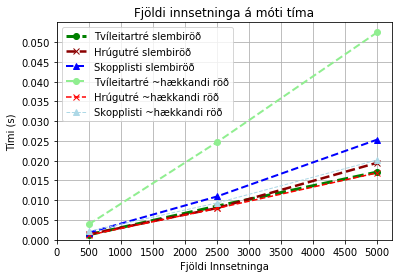

In [48]:
grafInnsetningartimi(TaflaInnsetningartimiSlembid,
                    TaflaInnsetningartimiRadad, k, ns)

Myndræn framsetning er gagnleg til að túlka niðurstöður betur. Hér sést betur að skopplistinn er ekki vonlaus, og er sannarlega mikið betri en tvíleitartréið þegar gildin eru sett inn í ~_hækkandi_ röð, því þá getur hann tekið mörg stór skref nánast alla leið út í enda.

<hr>
#### 5.1.1 Leitartími
##### Einungis leitað í að lyklum sem eru í gagnagrindunum

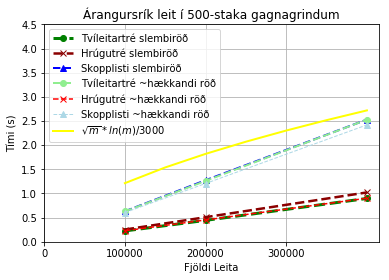

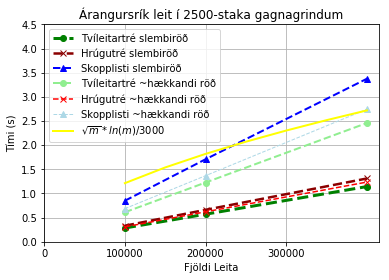

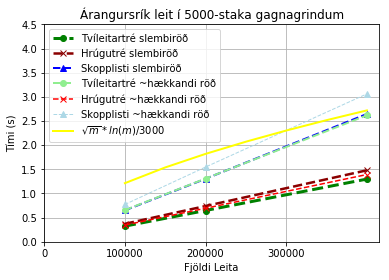

In [49]:
for i in range(k):
    grafLeitartimi(TaflaArangursrikurLeitartimiSlembid[i],
               TaflaArangursrikurLeitartimiRadad[i], k, ms, ns[i],
               'Árangursrík leit í %d-staka gagnagrindum',i)

Með ágiskun fannst fall sem vex álíka hratt og leitartíminn, þó gera mætti betur. Á línuritunum sést þetta fall, $\frac{\sqrt{m}*ln(m)}{3000}$, en lograföll með fastastuðli virtust vaxa of hægt. 
Það eru nokkrar mögulegar ástæður fyrir því:
- Útfærslur gagnagrindanna eru ekki óaðfinnanlegar.
- Tímaflækja er fjöldi aðgerða, ekki raunverulegur tími. Fleiri hlutir en fjöldi aðgerða hefur áhrif á tímamælingar í tölvu. Áhugavert væri að prófa aðrar aðferðir til að tímamæla.
- Skala þarf lograföllin og stærðirnar til, mögulega þarf að tímamæla fleiri aðgerðir. Það er alls ekki víst að eitt og sama lografallið passi við allar aðgerðirnar.

#####  Helmingur leita er að lyklum sem eru ekki í gagnagrindunum

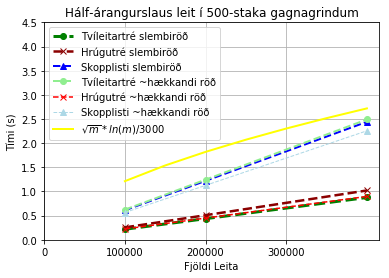

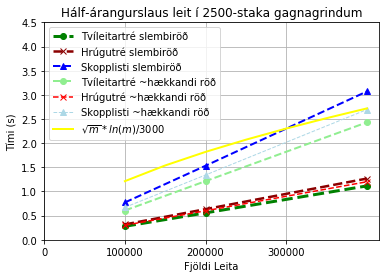

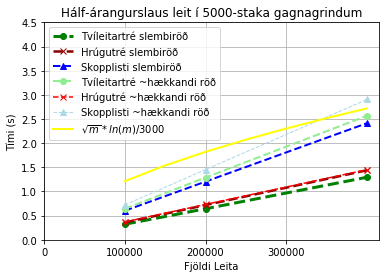

In [50]:
for i in range(k):
    grafLeitartimi(TaflaArangurslitillLeitartimiSlembid[i],
               TaflaArangurslitillLeitartimiRadad[i], k, ms, ns[i],
               'Hálf-árangurslaus leit í %d-staka gagnagrindum', k+i)

<hr>
## 6. Niðurstaða og samantekt

Það hefði verið hægt að gera fleiri töflur til að bera saman mælingar á aðra vegu án þess að breyta gögnunum. T.d. væri hægt að skoða leitartíma með fast $m=100.000$ og skoða breytileg $n$, til að sjá betur að jafnmargar leitir í stærri lyklasöfnum taka örlítið lengri tíma, en það sést vel þegar mismunandi gröf eru borin saman. Svipaða hluti væri hægt að gera með gröfin, en heildarmyndin er skýr eins og er.

Það er ljóst að hrúgutréið kemur best út úr tímamælingunum í heild. Það virðist vera áreiðanlegt lyklasafn sem virkar vel undir hvers kyns kringumstæðum. 

Tvíleitartréið stendur sig best af þessum lyklasöfnum þegar notandinn getur verið viss um að innsetningin verði slembin og að valin sé góð rót, þannig að það vaxi jafnt. Hins vegar fellur tvíleitartréið aftur úr ef gildin eru sett inn í næstum því hækkandi röð, og $n/2$ víxlanir voru alls ekki nóg til að bjarga því frá því að haga sér eins og í sínu versta tilfelli.

Það væri sannarlega áhugavert að skoða skopplistann betur. Hann fékk ekki að sína styrkleika sína, t.d. ef framkvæmd yrði leit að lykli sem er minni en minnsti lykillinn í lyklasöfnunum, eða ef innsetning væri í lækkandi röð þá myndi skopplistinn sleppa við gríðarlega margar ítranir. Til fróðleiks skulum við útfæra lítinn þannig módúl aukalega.

## 7. Fleiri aðgerðir og viðbætur

### 7.1 Módúll til að búa til gögn og framkvæma mælingar

In [54]:
""""""""""""""" local imports """""""""""""""
# from Treap import Treap
# from Tree import Tree
# from SkipList import SkipList
# from FunctionsV2 import SmidaInnsetningarLyklaLista, SmidaLeitarLyklaLista
# from FunctionsV2 import MaelaInnsetningartima, MaelaLeitartima

""""""""""""""" Fjöldi mælinga """""""""""""""
k = 3
ns = [500, 2500, 5000]
ms = [100000, 200000, 400000]

""""""""""""""" Mælingar á innsetningartíma """""""""""""""


### BREYTA SVO ÉG ENDURTAKI ALLT ÞETTA HÉRNA 10 SINNUM OG TEK SVO MEÐALTAL ALLRA MÆLINGA
### EINS OG ER ÞÁ ER ÉG AÐ ENDURTAKA TILRAUN TIL INNSETNINGA Á FULLAR GAGNAGRINDUR


""" Smíða gögn til innsetningar """
SlembnirLyklar = []
RadadirLyklar = []
SmidaInnsetningarLyklaLista(SlembnirLyklar, RadadirLyklar, ns)

""" Setja gögn í gagnagrindur. Tvíleitartréi fá að byrja með eitt gildi af 500-5000 """
TreeS = [Tree(SlembnirLyklar[0][0]), Tree(SlembnirLyklar[1][0]), Tree(SlembnirLyklar[2][0])]
TreeR = [Tree(RadadirLyklar[0][0]), Tree(RadadirLyklar[1][0]), Tree(RadadirLyklar[2][0])]
innsetningartimiTreeSlembid = MaelaInnsetningartima(TreeS,SlembnirLyklar,k)
innsetningartimiTreeRadad = MaelaInnsetningartima(TreeR,RadadirLyklar,k)

TreapS = [Treap(),Treap(),Treap()]
TreapR = [Treap(),Treap(),Treap()]
innsetningartimiTreapSlembid = MaelaInnsetningartima(TreapS,SlembnirLyklar,k)
innsetningartimiTreapRadad = MaelaInnsetningartima(TreapR,RadadirLyklar,k)


SkipListS = [SkipList(), SkipList(), SkipList()]
SkipListR = [SkipList(), SkipList(), SkipList()]
innsetningartimiSkipListSlembid = MaelaInnsetningartima(SkipListS,SlembnirLyklar,k)
innsetningartimiSkipListRadad = MaelaInnsetningartima(SkipListR,RadadirLyklar,k)

In [8]:
""""""""""""""" Mælingar á leitartíma """""""""""""""
""" Smíða gögn til að leita að """
ArangursrikirLyklar = SmidaLeitarLyklaLista(ms[2], ns, k, False)
ArangurslitlirLyklar = SmidaLeitarLyklaLista(ms[2], ns, k, True)


""" Leitad ad lyklum sem eru i gagnagrindunum """
arangursrikurLeitartimiTreeSlembid = MaelaLeitartima(
                                        TreeS, ArangursrikirLyklar, ms, k)
arangursrikurLeitartimiTreeRadad = MaelaLeitartima(
                                        TreeR, ArangursrikirLyklar, ms, k)

arangursrikurLeitartimiTreapSlembid = MaelaLeitartima(
                                        TreapS, ArangursrikirLyklar, ms, k)
arangursrikurLeitartimiTreapRadad = MaelaLeitartima(
                                        TreapR, ArangursrikirLyklar, ms, k)

arangursrikurLeitartimiSkipListSlembid = MaelaLeitartima(
                                        SkipListS, ArangursrikirLyklar, ms, k)
arangursrikurLeitartimiSkipListRadad = MaelaLeitartima(
                                        SkipListR, ArangursrikirLyklar, ms, k)


""" Leitad ad lyklum þar sem helmingur er i gagnagrindunum """
arangurslitillLeitartimiTreeSlembid = MaelaLeitartima(
                                        TreeS, ArangurslitlirLyklar, ms, k)
arangurslitillLeitartimiTreeRadad = MaelaLeitartima(
                                        TreeR, ArangurslitlirLyklar, ms, k)

arangurslitillLeitartimiTreapSlembid = MaelaLeitartima(
                                        TreapS, ArangurslitlirLyklar, ms, k)
arangurslitillLeitartimiTreapRadad = MaelaLeitartima(
                                        TreapR, ArangurslitlirLyklar, ms, k)

arangurslitillLeitartimiSkipListSlembid = MaelaLeitartima(
                                        SkipListS, ArangurslitlirLyklar, ms, k)
arangurslitillLeitartimiSkipListRadad = MaelaLeitartima(
                                        SkipListR, ArangurslitlirLyklar, ms, k)

### 7.2 Föll til að smíða og birta töflur

In [32]:
from IPython.display import HTML, display
import tabulate

# Skeytir línuheiti L fram fyrir hverja línu í T
def TaflaLinuheiti(L,T):
    for i in range(len(L)):
        T[i] = [L[i]] + T[i]
    return T

# Býr til lista af gildum með leitartíma til að birta í töflu
def LeitartimaToflur(L,T,ms):
    Ts = []
    for i in range(len(T[0])):
        Ts.append(
            TaflaLinuheiti(L, [ms
                ,T[0][i],T[1][i],T[2][i]]))
    return Ts

# Birtir staka töflu sem HTML Table í Jupyter Notebook
def BirtaTofluHTML(T,H=""):
    display(HTML("<h6>" + H + "</h6>"))
    display(HTML(tabulate.tabulate(T, tablefmt='html')))
    
# Birtir lista af töflum sem HTML Table í Jupyter Notebook
def BirtaToflurHTML(Ts,ns,H):
    for i in range(len(ns)):
        BirtaTofluHTML(Ts[i],H%ns[i])


### 7.3 Módúll til að smíða töflur

In [31]:
LinuheitiInnsetning = ['Fjöldi innsetninga','Tvíleitartré','Hrúgutré','Skopplisti']

TaflaInnsetningartimiSlembid = TaflaLinuheiti(LinuheitiInnsetning,
                            [ns,innsetningartimiTreeSlembid,
                                innsetningartimiTreapSlembid,
                                innsetningartimiSkipListSlembid])

TaflaInnsetningartimiRadad = TaflaLinuheiti(LinuheitiInnsetning,
                            [ns,innsetningartimiTreeRadad,
                                innsetningartimiTreapRadad,
                                innsetningartimiSkipListRadad])

LinuheitiLeit = ['Fjöldi leita','Tvíleitartré','Hrúgutré','Skopplisti']

tempT = [arangursrikurLeitartimiTreeSlembid, arangursrikurLeitartimiTreapSlembid, arangursrikurLeitartimiSkipListSlembid]
TaflaArangursrikurLeitartimiSlembid = LeitartimaToflur(LinuheitiLeit, tempT,ms)

tempT = [arangursrikurLeitartimiTreeRadad,arangursrikurLeitartimiTreapRadad,arangursrikurLeitartimiSkipListRadad]
TaflaArangursrikurLeitartimiRadad = LeitartimaToflur(LinuheitiLeit, tempT,ms)

tempT = [arangurslitillLeitartimiTreeSlembid, arangurslitillLeitartimiTreapSlembid, arangurslitillLeitartimiSkipListSlembid]
TaflaArangurslitillLeitartimiSlembid = LeitartimaToflur(LinuheitiLeit, tempT,ms)

tempT = [arangurslitillLeitartimiTreeRadad, arangurslitillLeitartimiTreapRadad, arangurslitillLeitartimiSkipListRadad]
TaflaArangurslitillLeitartimiRadad = LeitartimaToflur(LinuheitiLeit, tempT,ms)
del(tempT)

### 7.4 Föll til að smíða gröf

In [33]:
def grafInnsetningartimi(TIS, TIR, k, ns):
    figInnsetning, axisInnsetning = plt.subplots()
    litir1 = ['green', 'darkred', 'blue']
    litir2 = ['lightgreen', 'red', 'lightblue']
    merki = ['o', 'x', '^']
    titlarB = [' slembiröð', ' ~hækkandi röð'] 
    
    for i in range(1,k+1):
        axisInnsetning.plot(ns,TIS[i][1:4],
        marker=merki[i-1], linestyle='dashed', color=litir1[i-1], 
        linewidth=(k-i)/2+2, label=TIR[i][0]+titlarB[0])
    
    for i in range(1,k+1):
        axisInnsetning.plot(ns,TIR[i][1:4],
        marker=merki[i-1], linestyle='dashed', color=litir2[i-1],
        linewidth=(k-i)/2+1, label=TIR[i][0]+titlarB[1])
    axisInnsetning.set(xlabel='Fjöldi Innsetninga', 
                    ylabel='Tími (s)',
                    title = 'Fjöldi innsetninga á móti tíma')
    axisInnsetning.set_ylim([0,0.055])
    plt.yticks(np.arange(0, 0.055, 0.005))
    plt.xticks(np.arange(0, 5500, 500))
    axisInnsetning.legend()
    axisInnsetning.grid()
    plt.show()
    figInnsetning.savefig('GrafInnsetningartimi.png')


def grafLeitartimi(TS, TR, k, ms, n, t, c):
    fig, axis = plt.subplots()
    litir1 = ['green', 'darkred', 'blue']
    litir2 = ['lightgreen', 'red', 'lightblue']
    merki = ['o', 'x', '^']
    titlarB = [' slembiröð', ' ~hækkandi röð'] 
    for i in range(1,k+1):
        axis.plot(ms,TS[i][1:4],
        marker=merki[i-1], linestyle='dashed', color=litir1[i-1], 
        linewidth=(k-i)/2+2, label=TS[i][0]+titlarB[0])
    
    for i in range(1,k+1):
        axis.plot(ms,TR[i][1:4],
        marker=merki[i-1], linestyle='dashed', color=litir2[i-1],
        linewidth=(k-i)/2+1, label=TR[i][0]+titlarB[1])
    axis.set(xlabel='Fjöldi Leita', 
                    ylabel='Tími (s)',
                    title = t%n)
    
    xs = np.arange(ms[0], ms[2]+ms[0]//2, ms[0]//2)
    lg = lambda x: np.multiply(np.log1p(x),x**0.5/3000)
    ys = lg(xs)
    axis.plot(xs, ys, color='yellow', linewidth=2, label='$\sqrt{m} * ln(m) / 3000$')
    plt.xticks(np.arange(0, ms[2], ms[0]))
    plt.yticks(np.arange(0, 5, 0.5))
    axis.legend()
    axis.grid()
    plt.show()
    fig.savefig('GrafLeitartimi%d-%d.png'%(n,c))

### 7.5 Meira um SkipList

In [28]:
# class SkipList:
# ...
    """ prentar hvern layer af listum L í SkipList á forminu:
        L[0].key (L[0].down.key) -> L[1] (L[1].down.key)...
    """
    def printSkipList(self):
        h = self.layers
        SL = self.sortedLists
        for i in range(h,-1,-1):
            L = SL[i]
            v = L.head
            l = ''
            d = ''
            while v is not None:
                d = str(v.down.key) if v.down is not None else ''
                l += str(v.key)  + ' (' + d + ') ' + '-> '
                v = v.right
            print(l)
            print(d)
            print()

def mainSkipList():
    skiplist = SkipList()
    
    for i in range(15):
        r = 2*i-1 # random.randint(0,100)
        skiplist.insert(r)

    skiplist.printSkipList()
    
    c=0
    for i in range(30):
        if not skiplist.contains(i):
            c+=1
    print(c)


IndentationError: unexpected indent (<ipython-input-28-4c158c6bd7de>, line 3)